In [1]:
import yaml
import argparse
import os
import sys
import numpy as np
import torch
import gym
import matplotlib
import matplotlib.pyplot as plt
import unittest
from DeepLearning_Models.utils.general import join, plot_combined
from DeepLearning_Models.ActorCritic.policy_gradient import PolicyGradient
from EnvRunner import GymRunner
from Explanations_Models.DT_LIME.LIME import LIME
from Explanations_Models.DT_LIME.sampling_methods import Uniform_Sampler
import json
from ExplanationRunner import MetricGetter
yaml.add_constructor("!join", join)
config = yaml.load(open("config_envs/half_cheetah.yml"), Loader= yaml.FullLoader)
config.update(yaml.load(open("config_explanations/half_cheetah.yml"), Loader= yaml.FullLoader))
Runner = GymRunner(config)
Runner.load_weights()


device:  cpu


In [2]:
thangs = {}
for i in os.listdir("MetricFiles/CartPole-v1/Policy"):
    thangs[i[:-5]] = json.load(open("MetricFiles/CartPole-v1/Policy/" + i))

Loaded backend module://matplotlib_inline.backend_inline version unknown.


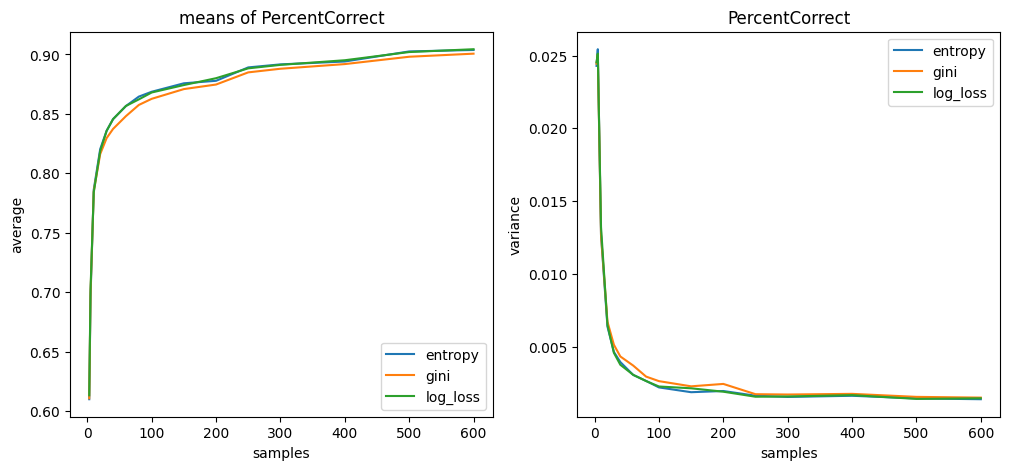

In [3]:
%matplotlib inline
variable = "PercentCorrect"
vars = {}
means = {}
xs = []
for j in thangs.keys():
    means[j] = []
    vars[j] = []
for i in thangs["entropy"].keys():
    xs.append(int(i))
    for j in thangs.keys():
        means[j].append(np.mean(thangs[j][i][variable]))
        vars[j].append(np.var(thangs[j][i][variable]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("means of "+variable)
ax1.set_xlabel("samples")
ax1.set_ylabel("average")
ax2.set_title("vars of "+variable)
ax2.set_xlabel("samples")
ax2.set_ylabel("variance")
plt.title(variable)

for i in means.keys():
    ax1.plot(xs, means[i], label = i)
for i in vars.keys():
    ax2.plot(xs, vars[i], label = i)

ax1.legend()
ax2.legend()

plt.show()

In [6]:
from scipy import stats
def t_test(var1, var2):
    t_stat, p_value = stats.ttest_ind(thangs[var1]["600"]["PercentCorrect"], thangs[var2]["600"]["PercentCorrect"])
    print("Test for " + var1 + " vs " + var2)
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    print()

t_test("gini", "entropy")
t_test("entropy", "log_loss")
t_test("gini", "log_loss")



Test for gini vs entropy
T-statistic: -4.076338984996695
P-value: 4.610441152757024e-05

Test for entropy vs log_loss
T-statistic: -0.8462183800980757
P-value: 0.39745118295303894

Test for gini vs log_loss
T-statistic: -4.862895599821523
P-value: 1.1744370289548033e-06



In [8]:
np.load("uniform_samples\HalfCheetah-v4\input_samples.npy").shape

(10000, 17)

In [4]:
LM.surr_model.display_tree()

In [16]:
for i in thing.keys():
    for j in thing[i].keys():
        if type(thing[i][j]) == list:
            print(thing[i][j])
            for k in range(len(thing[i][j])):
                print(type(thing[i][j][k]))

[0.51, 0.495, 0.74, 0.51, 0.9]
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[0.99973714, 0.77664727, 0.10023394, 0.62364614, 0.12209195]
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
[0, 0, 0, 0, 0]
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
[0, 0, 1, 1, 1]
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
[1, 1, 2, 2, 2]
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
['angle', 'angle', 'vel', 'angle', 'angle_vel']
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
[0.81, 0.805, 0.885, 0.865, 0.875]
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[0.15928325, 0.06263796, 0.08045942, 0.6393279, 0.2653419]
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class

In [5]:
MG.Saver(thing)

'MetricFiles/CartPole-v1/Policy/gini.json'

In [11]:
thing = LIME(config, Runner)
thing.surr_model.Load(filename= "tree_4.pkl", path="SavedTrees/Policy/gini/3")

In [12]:
thing.surr_model.display_tree()

In [6]:
thing

{'3': {'PercentCorrect': [0.88, 0.495, 0.495, 0.51, 0.855],
  'EpisodeDistance': [0.09867910295724869,
   0.7760151028633118,
   0.6228576302528381,
   0.8617138266563416,
   0.8202632665634155],
  'Episode_Length_Distance': [0, 0, 0, 0, 0],
  'Depth': [1, 0, 0, 1, 1],
  'Breadth': [2, 1, 1, 2, 2],
  'TopSplits': ['angle_vel', 'angle', 'angle', 'angle', 'angle_vel'],
  'Path': 'SavedTrees/Policy/gini/3/tree_4.pkl'},
 '5': {'PercentCorrect': [0.5, 0.84, 0.745, 0.495, 0.51],
  'EpisodeDistance': [1.1155929565429688,
   0.21740132570266724,
   0.24682459235191345,
   0.7213442921638489,
   0.7014747262001038],
  'Episode_Length_Distance': [0, 0, 0, 0, 0],
  'Depth': [1, 1, 1, 0, 1],
  'Breadth': [2, 2, 2, 1, 2],
  'TopSplits': ['angle', 'angle_vel', 'vel', 'angle', 'x'],
  'Path': 'SavedTrees/Policy/gini/5/tree_4.pkl'},
 '10': {'PercentCorrect': [0.95, 0.78, 0.905, 0.905, 0.755],
  'EpisodeDistance': [0.8620252013206482,
   0.32922300696372986,
   0.2525949478149414,
   0.1911343336105346

In [10]:
thing2 = json.load(open('MetricFiles/CartPole-v1/Policy/gini.json', 'r'))
#plot percent_correct
samples = []
means = []
covs = []
for key in thing.keys():
    samples.append(int(key))
    means.append(np.mean(thing2[key]["PercentCorrect"]))
    covs.append()
print(x, y)

[3, 5, 10] [0.647, 0.618, 0.859]


In [11]:
thing2['5']

{'PercentCorrect': [0.5, 0.84, 0.745, 0.495, 0.51],
 'EpisodeDistance': [1.1155929565429688,
  0.21740132570266724,
  0.24682459235191345,
  0.7213442921638489,
  0.7014747262001038],
 'Episode_Length_Distance': [0, 0, 0, 0, 0],
 'Depth': [1, 1, 1, 0, 1],
 'Breadth': [2, 2, 2, 1, 2],
 'TopSplits': ['angle', 'angle_vel', 'vel', 'angle', 'x'],
 'Path': 'SavedTrees/Policy/gini/5/tree_4.pkl'}